In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sms

%matplotlib inline

In [132]:
df = pd.read_csv('/content/sample_data/Truck_sales new.csv')
df.head()

,Month-Year,Number_Trucks_Sold
0,03-jan.,155
1,03-Feb,173
2,03-mar.,204
3,03-Apr,219
4,03-May,223


In [133]:
df.isnull().sum()

,0
Month-Year,0
Number_Trucks_Sold,0


In [134]:
df.tail()

,Month-Year,Number_Trucks_Sold
139,14-Aug,933
140,14-Sep,704
141,14-Oct,639
142,14-nov.,571
143,14-Dec,666


In [135]:
df.shape

(144, 2)

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Month-Year          144 non-null    object
 1   Number_Trucks_Sold  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [137]:
def convert_to_mm_yyyy(Month_Year):
  year,month = Month_Year.split('-')
  cleaned_month = month.strip('.').capitalize()[:3]
  full_year = '20' + year
  full_date = f'{cleaned_month}{full_year}'
  return pd.to_datetime(full_date, format = '%b%Y').strftime('%Y-%m')

df['Date'] = df['Month-Year'].apply(convert_to_mm_yyyy)

print(df)

    Month-Year  Number_Trucks_Sold     Date
0      03-jan.                 155  2003-01
1       03-Feb                 173  2003-02
2      03-mar.                 204  2003-03
3       03-Apr                 219  2003-04
4       03-May                 223  2003-05
..         ...                 ...      ...
139     14-Aug                 933  2014-08
140     14-Sep                 704  2014-09
141     14-Oct                 639  2014-10
142    14-nov.                 571  2014-11
143     14-Dec                 666  2014-12

[144 rows x 3 columns]


In [138]:
df = df.drop('Month-Year', axis=1)

In [139]:
df.head()

,Number_Trucks_Sold,Date
0,155,2003-01
1,173,2003-02
2,204,2003-03
3,219,2003-04
4,223,2003-05


In [140]:
df = df.iloc[:,[1,0]]

df.head()

,Date,Number_Trucks_Sold
0,2003-01,155
1,2003-02,173
2,2003-03,204
3,2003-04,219
4,2003-05,223


In [141]:
print(df)

        Date  Number_Trucks_Sold
0    2003-01                 155
1    2003-02                 173
2    2003-03                 204
3    2003-04                 219
4    2003-05                 223
..       ...                 ...
139  2014-08                 933
140  2014-09                 704
141  2014-10                 639
142  2014-11                 571
143  2014-12                 666

[144 rows x 2 columns]


In [88]:
# This is required for train-test split by a ratio of 70:30

print(df.loc[[100]])

        Date  Number_Trucks_Sold
100  2011-05                 656


In [89]:
# Train-Test split

train_data = df[:101]
test_data = df[101:144]

In [90]:
train_data = train_data.set_index('Date')

In [92]:
train_data

,Number_Trucks_Sold
Date,
2003-01,155
2003-02,173
2003-03,204
2003-04,219
2003-05,223
...,...
2011-01,437
2011-02,440
2011-03,548


In [91]:
test_data = test_data.set_index('Date')
test_data

,Number_Trucks_Sold
Date,
2011-06,650
2011-07,716
2011-08,719
2011-09,560
2011-10,481
2011-11,447
2011-12,517
2012-01,471
2012-02,465


<Axes: xlabel='Date'>

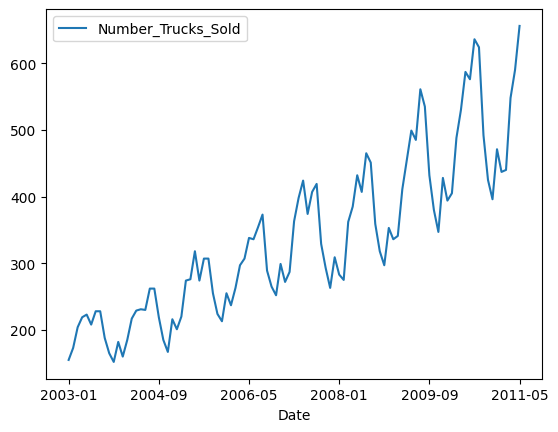

In [93]:
train_data.plot()

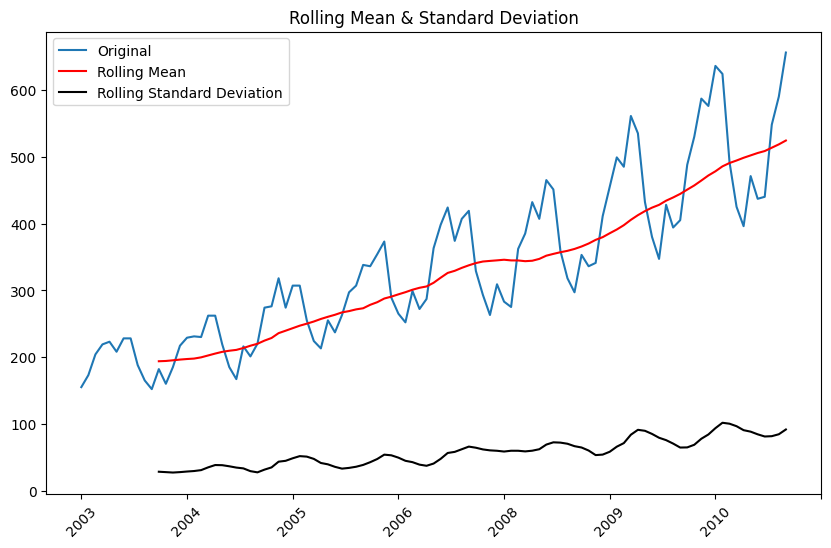

In [94]:
# Rolling Statistics

from matplotlib.ticker import MaxNLocator

rolling_mean = train_data['Number_Trucks_Sold'].rolling(window = 12).mean() # 12 period rolling mean
rolling_std = train_data['Number_Trucks_Sold'].rolling(window = 12).std() # 12 period rolling standard deviation

# Plotting the values

plt.figure(figsize = (10,6))
plt.plot(train_data['Number_Trucks_Sold'], label = 'Original')
plt.plot(rolling_mean, label = 'Rolling Mean', color = 'red')
plt.plot(rolling_std, label = 'Rolling Standard Deviation', color = 'black')
plt.title('Rolling Mean & Standard Deviation')
truncated_labels = [str(label)[:4] for label in train_data.index]  # Truncate to first 7 characters
plt.xticks(train_data.index, truncated_labels, rotation=45)  # Rotate for readability
ax = plt.gca() # Gets current axis
ax.xaxis.set_major_locator(MaxNLocator(nbins=8))
plt.legend()
plt.show()

### From the above plot we can see that, the trend shows seasonal variations. Hence, the dataset is not stationery. For making forecasts, we need to make the dataset stationery for which we will now start with the Augmented Dickey-Fuller(ADF) test.

In [95]:
# Stationarity Test

from statsmodels.tsa.stattools import adfuller

### 1. Null Hypothesis (H₀):
    The time series is non-stationary (i.e., it has a unit root).

    This means that the statistical properties (such as mean, variance, and autocorrelation) of the time series change over time.

    The presence of a unit root indicates the time series follows a stochastic trend, and is not stationary.

###  2. Alternate Hypothesis (H₁):
    The time series is stationary (i.e., it does not have a unit root).

    This means that the statistical properties of the time series remain constant over time.

    A stationary time series has no unit root, implying that it reverts to a mean, and its variance and autocorrelation structure do not change over time.

In [96]:
def adf_test(series):
  result = adfuller(series)
  print('ADF Statistics: {}'.format(result[0]))
  print('p-value: {}'.format(result[1]))
  if result[1] <= 0.05:
    print('Strong evidence against the null hypothesis. Hence, null hypothesis is rejected indicating data is stationery.')
  else:
    print('Weak evidence against the null hypothesis. Hence, null hypothesis is accepted indicating data is not stationery.')

In [97]:
adf_test(train_data['Number_Trucks_Sold'])

ADF Statistics: 0.9103273316294213
p-value: 0.9932236315543095
Weak evidence against the null hypothesis. Hence, null hypothesis is accepted indicating data is not stationery.


In [98]:
# Use Techniques Differencing

train_data['Trucks_1st_diff'] = train_data['Number_Trucks_Sold']-train_data['Number_Trucks_Sold'].shift(1)

train_data.head()

,Number_Trucks_Sold,Trucks_1st_diff
Date,,
2003-01,155,NaN
2003-02,173,18.0
2003-03,204,31.0
2003-04,219,15.0
2003-05,223,4.0


In [99]:
adf_test(train_data['Trucks_1st_diff'].dropna())

ADF Statistics: -2.413326456276272
p-value: 0.13801038766452034
Weak evidence against the null hypothesis. Hence, null hypothesis is accepted indicating data is not stationery.


In [100]:
train_data['Trucks_2nd_diff'] = train_data['Trucks_1st_diff']-train_data['Trucks_1st_diff'].shift(1)

train_data.head()

,Number_Trucks_Sold,Trucks_1st_diff,Trucks_2nd_diff
Date,,,
2003-01,155,NaN,NaN
2003-02,173,18.0,NaN
2003-03,204,31.0,13.0
2003-04,219,15.0,-16.0
2003-05,223,4.0,-11.0


In [101]:
adf_test(train_data['Trucks_2nd_diff'].dropna())

ADF Statistics: -10.50692527649132
p-value: 1.0484295867943598e-18
Strong evidence against the null hypothesis. Hence, null hypothesis is rejected indicating data is stationery.


In [102]:
# Since our data is seasonal so we will need to do 12 months differencing

train_data['Trucks_12_diff'] = train_data['Number_Trucks_Sold']-train_data['Number_Trucks_Sold'].shift(12)

train_data.head(15)

,Number_Trucks_Sold,Trucks_1st_diff,Trucks_2nd_diff,Trucks_12_diff
Date,,,,
2003-01,155,NaN,NaN,NaN
2003-02,173,18.0,NaN,NaN
2003-03,204,31.0,13.0,NaN
2003-04,219,15.0,-16.0,NaN
2003-05,223,4.0,-11.0,NaN
2003-06,208,-15.0,-19.0,NaN
2003-07,228,20.0,35.0,NaN
2003-08,228,0.0,-20.0,NaN
2003-09,188,-40.0,-40.0,NaN


In [103]:
adf_test(train_data['Trucks_12_diff'].dropna())

ADF Statistics: -2.7957535865044614
p-value: 0.05888290285451609
Weak evidence against the null hypothesis. Hence, null hypothesis is accepted indicating data is not stationery.


### From above we can see that for seasonal data we needed to do differencing only once for 12 months after which our condition for p-value got satisfied.

In [104]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

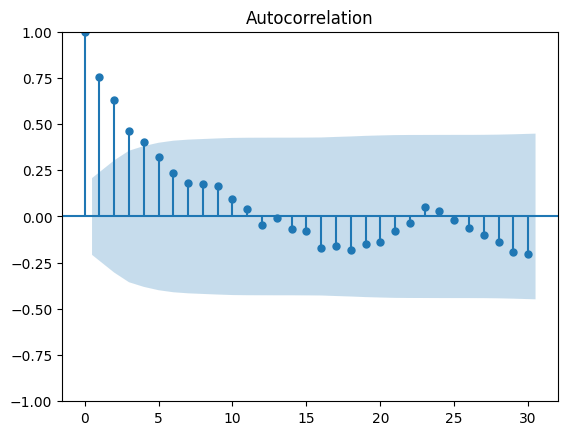

In [105]:
# ACF is required for getting the 'q' value which is related to Moving Averages Model.
# It specifies how many lagged error terms (or residuals) are included in the model to predict the current value of the time series.
# A Moving Average (MA) model uses the past forecast errors (or residuals) to predict future values.
# Unlike an AutoRegressive (AR) model that relies on past values of the time series itself, an MA model uses the lagged errors (i.e., how far off the model was in the past) to correct the current prediction.

acf = plot_acf(train_data['Trucks_12_diff'].dropna(), lags = 30)

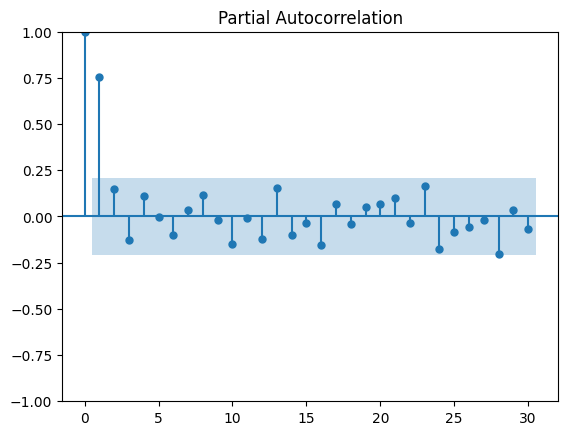

In [106]:
# PACF is required for getting the 'p' value which is related to the Auto-Regressive model.
# It denotes the number of lagged terms (past values) of the time series that are used to predict the current value.

pacf = plot_pacf(train_data['Trucks_12_diff'].dropna(), lags = 30)

### Since our original plot from sales data indicated seasonality, hence we need to consider SARIMA model. SARIMA model is as follows: ARIMA (p,d,q) x (P,D,Q)S.

### p -> non-seasonal AR order
### d -> non-seasonal differencing
### q -> non-seasonal MA order
### P -> seasonal AR order
### D -> seasonal differencing
### Q -> seasonal MA order
### S -> time-span of repeating seasonal pattern

### From the above plots we can see that ACF is decaying exponentially and in PACF we have 1 significant spike so for non-seasonal model we will consider AR(1) model (p = 1, q = 0) with value of d = 2 (As we saw, we needed to difference it twice in non-seasonal). For seasonal, we saw that we got stationery time series just after 1st differencing(shift = 12), so D = 1. Since no seasonalities are found in ACF, PACF plots, we will go with P = 0, Q = 0.
### S = 12 for accounting monthly data

In [107]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [108]:
# Prediction using manual detection of SARIMA parameters

# For non-seasonal model, as stated above we will go with AR(1) model
p,d,q = 1,2,0

P,D,Q,s = 0,1,0,12

sarima_model = SARIMAX(train_data['Number_Trucks_Sold'], order = (p,d,q), seasonal_order = (P,D,Q,s))
sarima_model_fit = sarima_model.fit(disp = False)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [109]:
# Forecasting

n_test = len(test_data['Number_Trucks_Sold'])
forecast = sarima_model_fit.forecast(steps = n_test)

In [110]:
# Finding RMSE
from sklearn.metrics import mean_squared_error

test_actual = test_data['Number_Trucks_Sold'].values
test_predicted = forecast.values
rmse = np.sqrt(mean_squared_error(test_actual, test_predicted))
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 302.70261731074197


In [111]:
train_data['Number_Trucks_Sold'].values

array([155, 173, 204, 219, 223, 208, 228, 228, 188, 165, 152, 182, 160,
       185, 217, 229, 231, 230, 262, 262, 219, 185, 167, 216, 201, 220,
       274, 276, 318, 274, 307, 307, 255, 224, 213, 255, 237, 263, 297,
       307, 338, 336, 354, 373, 289, 265, 252, 299, 272, 287, 363, 398,
       424, 374, 407, 419, 329, 293, 263, 309, 283, 275, 362, 385, 432,
       407, 465, 451, 359, 318, 297, 353, 336, 341, 411, 455, 499, 485,
       561, 535, 432, 380, 347, 428, 394, 405, 488, 530, 587, 576, 636,
       624, 492, 425, 396, 471, 437, 440, 548, 590, 656])

In [112]:
test_actual

array([650, 716, 719, 560, 481, 447, 517, 471, 465, 558, 590, 671, 670,
       756, 778, 560, 497, 453, 519, 499, 501, 625, 671, 777, 727, 844,
       861, 641, 564, 529, 624, 578, 572, 646, 781, 872, 824, 958, 933,
       704, 639, 571, 666])

In [113]:
test_predicted

array([ 648.26902022,  715.18738814,  707.78194074,  581.85624207,
        519.98827561,  496.72032223,  577.0702952 ,  548.66356332,
        557.10190705,  670.63890284,  718.1130794 ,  789.62725771,
        787.38498412,  859.80827824,  857.89742853,  737.4729045 ,
        681.10192465,  663.3336247 ,  749.18155294,  726.27385768,
        740.21054944,  859.24633174,  912.21901561,  989.23187901,
        992.4881773 , 1070.41011539, 1073.99786375,  959.07196702,
        908.19959585,  895.92991644,  987.27645767,  969.8673802 ,
        989.3026867 , 1113.83708568, 1172.308385  , 1254.81986463,
       1263.57477865, 1346.99533279, 1356.081697  , 1246.65441624,
       1201.28066096, 1194.5095975 , 1291.35475464])

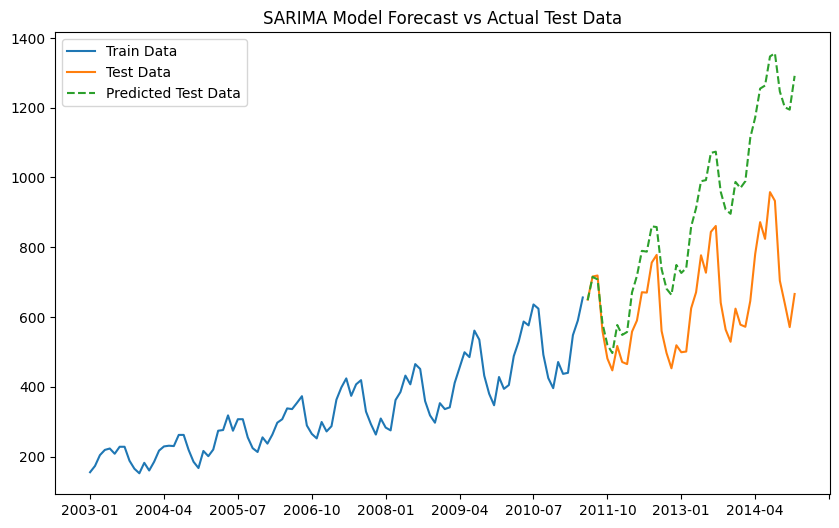

In [115]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10,6))
plt.plot(train_data.index, train_data['Number_Trucks_Sold'].values, label='Train Data')
plt.plot(test_data.index, test_actual, label='Test Data')
plt.plot(test_data.index, test_predicted, label='Predicted Test Data', linestyle='--')
plt.legend(loc='upper left')
plt.title('SARIMA Model Forecast vs Actual Test Data')
ax = plt.gca() # Gets current axis
ax.xaxis.set_major_locator(MaxNLocator(nbins=12))
plt.show()

In [ ]:
# Trying to find best values using iterations for m = 12
import itertools
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings

# Ignore warnings related to statsmodels convergence
warnings.filterwarnings("ignore")

series = train_data['Number_Trucks_Sold']

# Define the range of parameters to test
p = d = q = range(0, 3)
P = D = Q = range(0, 3)
m = 12

# Create a list with all combinations of p, d, q, P, D, Q values
param_combinations = list(itertools.product(p, d, q, P, D, Q))

# Initialize variables to store the best parameters and AIC
best_aic = float("inf")
best_params = None

# Loop through all parameter combinations
for params in param_combinations:
    try:
        # Extract parameters
        non_seasonal_order = (params[0], params[1], params[2])
        seasonal_order = (params[3], params[4], params[5], m)

        # Fit SARIMA model
        model = SARIMAX(series,
                        order=non_seasonal_order,
                        seasonal_order=seasonal_order,
                        enforce_stationarity=False,
                        enforce_invertibility=False)

        results = model.fit(disp=False)

        # Compare AIC values
        if results.aic < best_aic:
            best_aic = results.aic
            best_params = (non_seasonal_order, seasonal_order)

        # Print current combination and AIC
        print(f"SARIMA{non_seasonal_order}x{seasonal_order} - AIC: {results.aic}")

    except Exception as e:
        print(f"Error for SARIMA{non_seasonal_order}x{seasonal_order}: {e}")
        continue

# Print the best combination of parameters and its AIC
print("\nBest Model:")
print(f"SARIMA{best_params[0]}x{best_params[1]} - AIC: {best_aic}")

SARIMA(0, 0, 0)x(0, 0, 0, 12) - AIC: 1462.8945608748593
SARIMA(0, 0, 0)x(0, 0, 1, 12) - AIC: 1214.436896689205
SARIMA(0, 0, 0)x(0, 0, 2, 12) - AIC: 1005.0942860883704
SARIMA(0, 0, 0)x(0, 1, 0, 12) - AIC: 944.0196899610842
SARIMA(0, 0, 0)x(0, 1, 1, 12) - AIC: 794.7597781575984
SARIMA(0, 0, 0)x(0, 1, 2, 12) - AIC: 2779.5971841846294
SARIMA(0, 0, 0)x(0, 2, 0, 12) - AIC: 759.0673125831423
SARIMA(0, 0, 0)x(0, 2, 1, 12) - AIC: 611.2744490488411
SARIMA(0, 0, 0)x(0, 2, 2, 12) - AIC: 2284.926609088845
SARIMA(0, 0, 0)x(1, 0, 0, 12) - AIC: 798.3917970646345
SARIMA(0, 0, 0)x(1, 0, 1, 12) - AIC: 763.1759821468959
SARIMA(0, 0, 0)x(1, 0, 2, 12) - AIC: 669.8014448581878
SARIMA(0, 0, 0)x(1, 1, 0, 12) - AIC: 767.6814167728234
SARIMA(0, 0, 0)x(1, 1, 1, 12) - AIC: 715.1072341116894
SARIMA(0, 0, 0)x(1, 1, 2, 12) - AIC: 582.5856731121536
SARIMA(0, 0, 0)x(1, 2, 0, 12) - AIC: 626.4237370249188
SARIMA(0, 0, 0)x(1, 2, 1, 12) - AIC: 611.2406744996088
SARIMA(0, 0, 0)x(1, 2, 2, 12) - AIC: 2438.758369661267
SARIMA(

In [ ]:
# Trying to find best values using iterations for m = 4
import itertools
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings

# Ignore warnings related to statsmodels convergence
warnings.filterwarnings("ignore")

series = train_data['Number_Trucks_Sold']

# Define the range of parameters to test
p = d = q = range(0, 3)
P = D = Q = range(0, 3)
m = 4

# Create a list with all combinations of p, d, q, P, D, Q values
param_combinations = list(itertools.product(p, d, q, P, D, Q))

# Initialize variables to store the best parameters and AIC
best_aic = float("inf")
best_params = None

# Loop through all parameter combinations
for params in param_combinations:
    try:
        # Extract parameters
        non_seasonal_order = (params[0], params[1], params[2])
        seasonal_order = (params[3], params[4], params[5], m)

        # Fit SARIMA model
        model = SARIMAX(series,
                        order=non_seasonal_order,
                        seasonal_order=seasonal_order,
                        enforce_stationarity=False,
                        enforce_invertibility=False)

        results = model.fit(disp=False)

        # Compare AIC values
        if results.aic < best_aic:
            best_aic = results.aic
            best_params = (non_seasonal_order, seasonal_order)

        # Print current combination and AIC
        print(f"SARIMA{non_seasonal_order}x{seasonal_order} - AIC: {results.aic}")

    except Exception as e:
        print(f"Error for SARIMA{non_seasonal_order}x{seasonal_order}: {e}")
        continue

# Print the best combination of parameters and its AIC
print("\nBest Model:")
print(f"SARIMA{best_params[0]}x{best_params[1]} - AIC: {best_aic}")

SARIMA(0, 0, 0)x(0, 0, 0, 4) - AIC: 1462.8945608748593
SARIMA(0, 0, 0)x(0, 0, 1, 4) - AIC: 1304.759839178478
SARIMA(0, 0, 0)x(0, 0, 2, 4) - AIC: 1246.555067502167
SARIMA(0, 0, 0)x(0, 1, 0, 4) - AIC: 1151.1066127341169
SARIMA(0, 0, 0)x(0, 1, 1, 4) - AIC: 1069.1267652357344
SARIMA(0, 0, 0)x(0, 1, 2, 4) - AIC: 980.8163123640791
SARIMA(0, 0, 0)x(0, 2, 0, 4) - AIC: 1202.382401112135
SARIMA(0, 0, 0)x(0, 2, 1, 4) - AIC: 1070.9560034442925
SARIMA(0, 0, 0)x(0, 2, 2, 4) - AIC: 957.6461165451499
SARIMA(0, 0, 0)x(1, 0, 0, 4) - AIC: 1164.4451844476523
SARIMA(0, 0, 0)x(1, 0, 1, 4) - AIC: 1070.1815066358117
SARIMA(0, 0, 0)x(1, 0, 2, 4) - AIC: 988.4390493140463
SARIMA(0, 0, 0)x(1, 1, 0, 4) - AIC: 1095.195153924235
SARIMA(0, 0, 0)x(1, 1, 1, 4) - AIC: 1064.7155896139545
SARIMA(0, 0, 0)x(1, 1, 2, 4) - AIC: 981.4470126574835
SARIMA(0, 0, 0)x(1, 2, 0, 4) - AIC: 1139.2819502200819
SARIMA(0, 0, 0)x(1, 2, 1, 4) - AIC: 1049.3756111151893
SARIMA(0, 0, 0)x(1, 2, 2, 4) - AIC: 948.2749133960378
SARIMA(0, 0, 0)x(2,

In [116]:
# Prediction using auto detection of SARIMA parameters by for loop
# Here we take the best model given by m = 12 as it has the lowest AIC

p,d,q = 2,1,1

P,D,Q,s = 0,1,2,12

sarima_model2 = SARIMAX(train_data['Number_Trucks_Sold'], order = (p,d,q), seasonal_order = (P,D,Q,s))
sarima_model2_fit = sarima_model2.fit(disp = False)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible sta

In [117]:
# Forecasting

n_test = len(test_data['Number_Trucks_Sold'])
forecast = sarima_model2_fit.forecast(steps = n_test)

In [118]:
# Finding RMSE
from sklearn.metrics import mean_squared_error

test_actual = test_data['Number_Trucks_Sold'].values
test_predicted2 = forecast.values
rmse = np.sqrt(mean_squared_error(test_actual, test_predicted2))
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 67.40059180983118


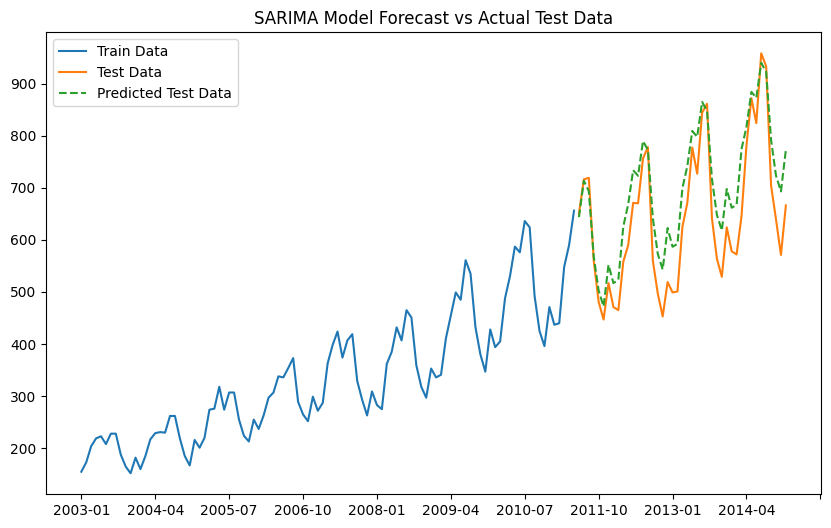

In [119]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10,6))
plt.plot(train_data.index, train_data['Number_Trucks_Sold'].values, label='Train Data')
plt.plot(test_data.index, test_actual, label='Test Data')
plt.plot(test_data.index, test_predicted2, label='Predicted Test Data', linestyle='--')
plt.legend(loc='upper left')
plt.title('SARIMA Model Forecast vs Actual Test Data')
ax = plt.gca() # Gets current axis
ax.xaxis.set_major_locator(MaxNLocator(nbins=12))
plt.show()

### From both models we can see that the sarima_model2 has performed much better than sarima_model. sarima_model2 had optimal parameters detected by the for loop which iterated through every possible combination of p,d,q,P,D,Q values. Thus we can see that integrating automation with model building helps improve our predictions to a great extent.

In [142]:
# Training sarima_model2 on the entire dataset and predicting the future values
print(df)

        Date  Number_Trucks_Sold
0    2003-01                 155
1    2003-02                 173
2    2003-03                 204
3    2003-04                 219
4    2003-05                 223
..       ...                 ...
139  2014-08                 933
140  2014-09                 704
141  2014-10                 639
142  2014-11                 571
143  2014-12                 666

[144 rows x 2 columns]


In [154]:
# Generate date range for 2015 and 2016
new_dates = pd.date_range(start='2015-01', end='2016-12', freq='MS').strftime('%Y-%m')

# Create a new DataFrame with NaN values or a default value for 'Number_Trucks_Sold'
new_data = pd.DataFrame({'Date': new_dates, 'Number_Trucks_Sold': [None] * len(new_dates)})

# Append the new rows to the existing dataframe
df_extended = pd.concat([df, new_data])

df_extended = df_extended.reset_index(drop = True)

# Print the updated dataframe
print(df_extended)

        Date Number_Trucks_Sold
0    2003-01                155
1    2003-02                173
2    2003-03                204
3    2003-04                219
4    2003-05                223
..       ...                ...
163  2016-08               None
164  2016-09               None
165  2016-10               None
166  2016-11               None
167  2016-12               None

[168 rows x 2 columns]


In [155]:
df_extended = df_extended.fillna('')
df_extended

,Date,Number_Trucks_Sold
0,2003-01,155
1,2003-02,173
2,2003-03,204
3,2003-04,219
4,2003-05,223
...,...,...
163,2016-08,
164,2016-09,
165,2016-10,
166,2016-11,


In [156]:
train_fullmodel = df_extended[:144]
train_fullmodel

,Date,Number_Trucks_Sold
0,2003-01,155
1,2003-02,173
2,2003-03,204
3,2003-04,219
4,2003-05,223
...,...,...
139,2014-08,933
140,2014-09,704
141,2014-10,639
142,2014-11,571


In [161]:
train_fullmodel.set_index('Date', inplace = True)
train_fullmodel

,Number_Trucks_Sold
Date,
2003-01,155
2003-02,173
2003-03,204
2003-04,219
2003-05,223
...,...
2014-08,933
2014-09,704
2014-10,639


In [162]:
test_fullmodel = df_extended[144:168]
test_fullmodel

,Date,Number_Trucks_Sold
144,2015-01,
145,2015-02,
146,2015-03,
147,2015-04,
148,2015-05,
149,2015-06,
150,2015-07,
151,2015-08,
152,2015-09,
153,2015-10,


In [163]:
test_fullmodel.set_index('Date', inplace = True)
test_fullmodel

,Number_Trucks_Sold
Date,
2015-01,
2015-02,
2015-03,
2015-04,
2015-05,
2015-06,
2015-07,
2015-08,
2015-09,


In [164]:
# Prediction using auto detection of SARIMA parameters by for loop
# Here we take the best model given by m = 12 as it has the lowest AIC

# Convert 'Number_Trucks_Sold' to numeric, handling potential errors
train_fullmodel['Number_Trucks_Sold'] = pd.to_numeric(train_fullmodel['Number_Trucks_Sold'], errors='coerce')

# Now, fit the SARIMAX model
from statsmodels.tsa.statespace.sarimax import SARIMAX

p,d,q = 2,1,1
P,D,Q,s = 0,1,2,12

sarima_full_model = SARIMAX(train_fullmodel['Number_Trucks_Sold'], order = (p,d,q), seasonal_order = (P,D,Q,s))
sarima_full_fit = sarima_full_model.fit(disp = False)

<ipython-input-164-eb1804dc8ff3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_fullmodel['Number_Trucks_Sold'] = pd.to_numeric(train_fullmodel['Number_Trucks_Sold'], errors='coerce')
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using

In [165]:
# Forecasting

n_test = len(test_fullmodel['Number_Trucks_Sold'])
forecast = sarima_full_fit.forecast(steps = n_test)

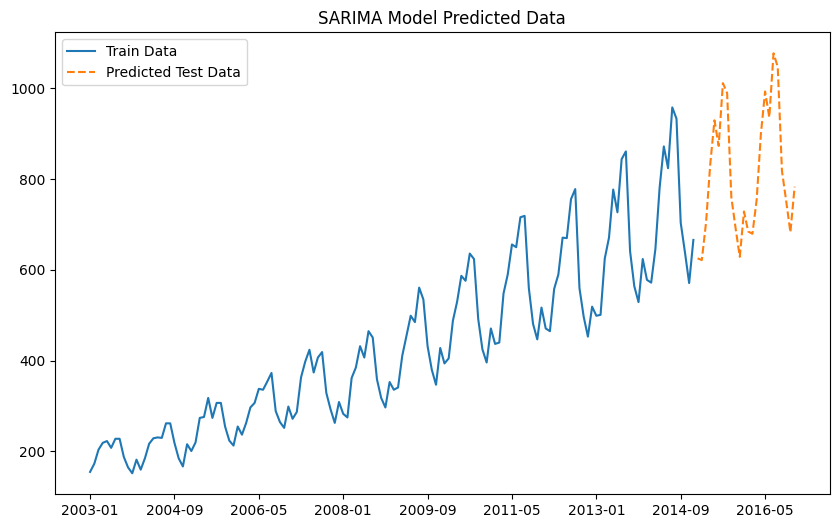

In [166]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10,6))
plt.plot(train_fullmodel.index, train_fullmodel['Number_Trucks_Sold'].values, label='Train Data')
plt.plot(test_fullmodel.index, forecast, label='Predicted Test Data', linestyle='--')
plt.legend(loc='upper left')
plt.title('SARIMA Model Predicted Data')
ax = plt.gca() # Gets current axis
ax.xaxis.set_major_locator(MaxNLocator(nbins=12))
plt.show()